# Linear Regression

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Model Diagnostics
8. Predictions and Evaluations

## 1. Import Libraries

In [2]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## 2. Load Data

In [13]:
df = pd.read_csv("Life Expectancy Data.csv")

In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 3. Understanding the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [16]:
df.describe()  

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [17]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [18]:
# Remove the extra space from column names

df = df.rename(columns=lambda x: x.strip())

In [19]:
#df = df.rename(columns=lambda x: x.replace(" ","_"))

In [21]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


## 4. Data Pre-processing

In [22]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [23]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 

# Encode labels in column 'Status'. 
df['Status']= label_encoder.fit_transform(df['Status'])
  
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
df['Status'].value_counts()

1    2426
0     512
Name: Status, dtype: int64

In [28]:
df.drop(['Country'],axis=1).skew()

Year                               -0.006409
Status                             -1.718238
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
BMI                                -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
HIV/AIDS                            5.396112
GDP                                 3.206655
Population                         15.916236
thinness  1-19 years                1.711471
thinness 5-9 years                  1.777424
Income composition of resources    -1.143763
Schooling                          -0.602437
dtype: float64

In [12]:
#Function to check skewness of data
def check_skewness(df):
    highly_skewd=[]
    moderate_skewd=[]
    for i,j in df.skew().items():
        if (j < -1) or (j > 1):
            highly_skewd.append(i)
            df[i].fillna(df[i].median(), inplace = True)
        elif (-1 > j > -0.5) or (0.5 < j < 1):
            moderate_skewd.append(i)
            df[i].fillna(df[i].mean(), inplace = True)
        else:
            df[i] = df[i].fillna(df[i].mean())
    return df
        

df = check_skewness(df[num_col])

In [13]:
print(df.isna().sum())
print(df.shape)

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
(2938, 20)


In [28]:
df = df.dropna()

In [29]:
df.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

## 5. Exploratory Data Analysis

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


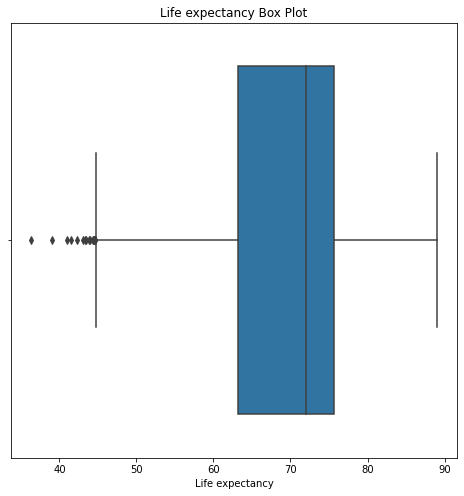

In [12]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8))
sns.boxplot(df['Life expectancy'])
plt.title('Life expectancy Box Plot')
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Life expectancy Distribution Plot'}, xlabel='Life expectancy', ylabel='Density'>

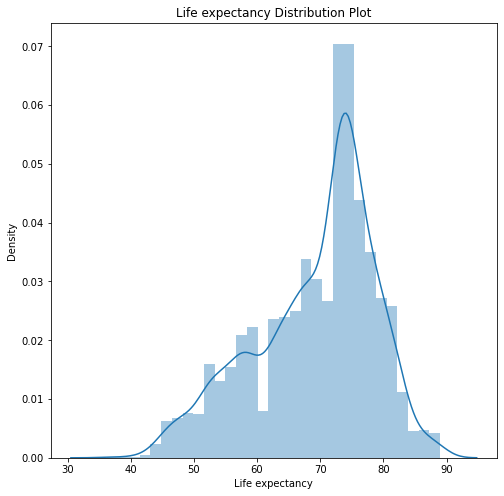

#### Summary : 

The y variable is having very few outliers and is almost linearly distributed. So the assumption for linear regression holds true

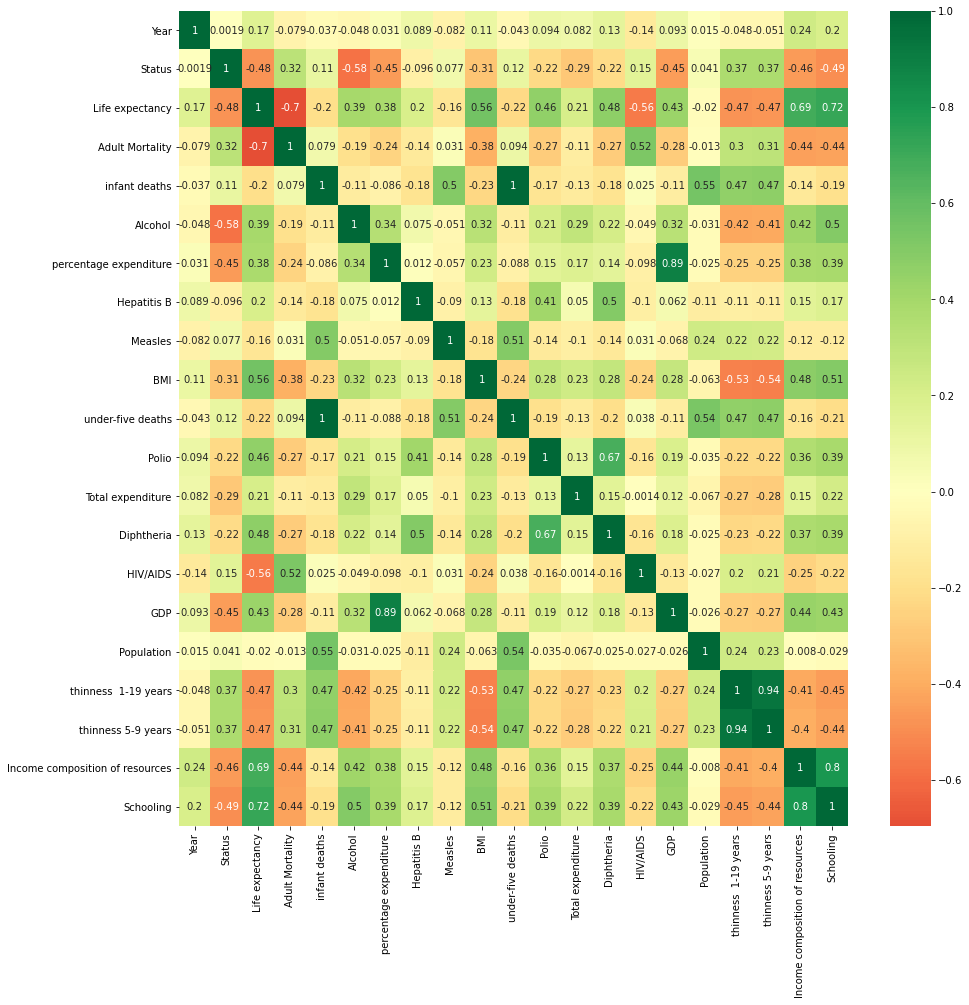

In [19]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

In [86]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044968,0.032723,0.022671,-0.081840,0.104094,-0.041980,0.091727,0.079003,0.131852,-0.138789,0.093170,0.014749,-0.044805,-0.047856,0.235866,0.207357
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.392403,0.381864,0.171255,-0.157586,0.562397,-0.222529,0.459458,0.209628,0.473268,-0.556556,0.430992,-0.028846,-0.467859,-0.462316,0.688591,0.718640
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.190799,-0.242860,-0.123971,0.031176,-0.383592,0.094146,-0.270597,-0.111753,-0.270877,0.523821,-0.281715,-0.005389,0.296076,0.301578,-0.436268,-0.437283
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.114796,-0.085906,-0.168393,0.501038,-0.227420,0.996628,-0.171273,-0.126781,-0.175747,0.024955,-0.103176,0.551608,0.464762,0.470397,-0.141329,-0.193250
Alcohol,-0.044968,0.392403,-0.190799,-0.114796,1.000000,0.339529,0.089916,-0.051769,0.325881,-0.111769,0.212675,0.300875,0.214188,-0.049686,0.312276,-0.027879,-0.418850,-0.407729,0.421515,0.498127
percentage expenditure,0.032723,0.381864,-0.242860,-0.085906,0.339529,1.000000,0.039805,-0.056831,0.230959,-0.088152,0.146546,0.175126,0.142897,-0.098230,0.901802,-0.017067,-0.250729,-0.252261,0.375234,0.389941
Hepatitis B,0.022671,0.171255,-0.123971,-0.168393,0.089916,0.039805,1.000000,-0.073544,0.116749,-0.171539,0.362537,0.067104,0.447373,-0.086197,0.076937,-0.125716,-0.099491,-0.102500,0.118166,0.134014
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.051769,-0.056831,-0.073544,1.000000,-0.176022,0.507718,-0.136966,-0.104748,-0.142680,0.030673,-0.069531,0.237096,0.224606,0.220866,-0.110884,-0.123651
BMI,0.104094,0.562397,-0.383592,-0.227420,0.325881,0.230959,0.116749,-0.176022,1.000000,-0.237825,0.285286,0.228141,0.284116,-0.243573,0.278325,-0.069356,-0.530465,-0.537439,0.478397,0.519133
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.111769,-0.088152,-0.171539,0.507718,-0.237825,1.000000,-0.189284,-0.128485,-0.196224,0.037783,-0.106448,0.539198,0.466640,0.471109,-0.159022,-0.208693


Few of the features are having the linear relationship with y variable. So linear regression would be good approach for the same

## 6. Model Building

In [25]:
# Train test split
X=df.drop(columns=['Life expectancy'])
y=df[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3
                                                    ,random_state=1234)

In [15]:
# Add a constant
X_train = sm.add_constant(X_train)

# Create a first ols model
model = sm.OLS(y_train, X_train).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     492.8
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:28:30   Log-Likelihood:                -5815.8
No. Observations:                2056   AIC:                         1.167e+04
Df Residuals:                    2036   BIC:                         1.178e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              86.0943     42.428      2.029      0.043       2.886     169.302
Year                               -0.0159      0.021     -0.749      0.454      -0.057       0.026
Adult Mortality                    -0.0202      0.001    -20.712      0.000      -0.022      -0.018
infant deaths                       0.0957      0.010      9.696      0.000       0.076       0.115
Alcohol                             0.0950      0.030      3.212      0.001       0.037       0.153
percentage expenditure              0.0001      0.000      1.283      0.200   -7.15e-05       0.000
Hepatitis B                        -0.0199      0.005     -4.309      0.000      -0.029      -0.011
Measles                         -2.482e-05   9.43e-06     -2.631      0.009   -4.33e-05   -6.32e-06
BMI                                 0.0463      0.006      7.514      0.000       0.034       0.058
under-five deaths                  -0.0714      0.007     -9.884      0.000      -0.086      -0.057
Polio                               0.0265      0.005      4.858      0.000       0.016       0.037
Total expenditure                   0.0968      0.042      2.306      0.021       0.014       0.179
Diphtheria                          0.0451      0.006      7.830      0.000       0.034       0.056
HIV/AIDS                           -0.5008      0.024    -20.687      0.000      -0.548      -0.453
GDP                              3.728e-05   1.61e-05      2.309      0.021    5.62e-06     6.9e-05
Population                      -3.728e-10   2.05e-09     -0.182      0.855   -4.38e-09    3.64e-09
thinness  1-19 years               -0.0816      0.061     -1.340      0.180      -0.201       0.038
thinness 5-9 years                  0.0012      0.060      0.021      0.983      -0.116       0.118
Income composition of resources     5.8913      0.774      7.607      0.000       4.373       7.410
Schooling                           0.7157      0.051     14.070      0.000       0.616       0.815
==============================================================================
Omnibus:                      117.994   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.271
Skew:                          -0.275   Prob(JB):                     2.59e-73
Kurtosis:                       4.897   Cond. No.                     2.49e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Dropping irrelvent features
X=df.drop(columns=['Life expectancy','Year','Population','thinness 5-9 years',
                   'GDP','percentage expenditure','thinness  1-19 years'])
y=df[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3
                                                    ,random_state=1234)

# Add a constant
X_train = sm.add_constant(X_train)

# Create a first ols model
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     695.4
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:29:39   Log-Likelihood:                -5847.9
No. Observations:                2056   AIC:                         1.172e+04
Df Residuals:                    2042   BIC:                         1.180e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              52.9367      0.659     80.340      0.000      51.644      54.229
Adult Mortality                    -0.0210      0.001    -21.422      0.000      -0.023      -0.019
infant deaths                       0.0901      0.010      9.171      0.000       0.071       0.109
Alcohol                             0.1441      0.028      5.090      0.000       0.089       0.200
Hepatitis B                        -0.0205      0.005     -4.382      0.000      -0.030      -0.011
Measles                         -2.336e-05   9.51e-06     -2.457      0.014    -4.2e-05   -4.71e-06
BMI                                 0.0518      0.006      8.893      0.000       0.040       0.063
under-five deaths                  -0.0682      0.007     -9.409      0.000      -0.082      -0.054
Polio                               0.0266      0.006      4.814      0.000       0.016       0.037
Total expenditure                   0.1182      0.042      2.839      0.005       0.037       0.200
Diphtheria                          0.0447      0.006      7.661      0.000       0.033       0.056
HIV/AIDS                           -0.4999      0.024    -20.552      0.000      -0.548      -0.452
Income composition of resources     6.7715      0.765      8.846      0.000       5.270       8.273
Schooling                           0.7466      0.051     14.568      0.000       0.646       0.847
==============================================================================
Omnibus:                      117.501   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.234
Skew:                          -0.261   Prob(JB):                     2.94e-75
Kurtosis:                       4.933   Cond. No.                     9.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X_test = sm.add_constant(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,model.predict(X_test))

16.463257804936077

<AxesSubplot:ylabel='Life expectancy'>

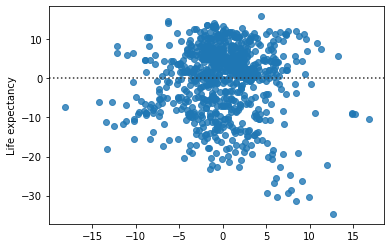

In [47]:
errors = y_test['Life expectancy'] - model.predict(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

# draw residplot
sns.residplot(x = errors,
              y = y_test['Life expectancy'])


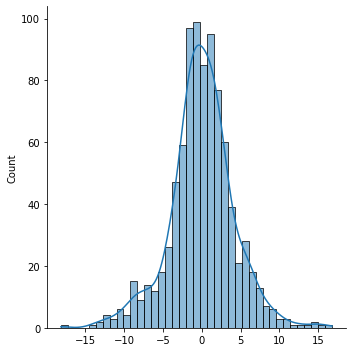

In [49]:
sns.displot(errors,kde=True)

## Approach 1 : Adding 1 varaible after 1

### Building model with 1 variable

In [89]:
# Select only one feature in regression model
X_train1 = X_train['Income composition of resources']

In [90]:
#sns.distplot(df['Income composition of resources'])

In [91]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train, X_train1).fit()

C:\Users\rroha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [92]:
# Check parameters created
model_1.params

const                              49.180002
Income composition of resources    31.851079
dtype: float64

In [93]:
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1849.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          2.13e-288
Time:                        12:42:11   Log-Likelihood:                -6865.3
No. Observations:                2049   AIC:                         1.373e+04
Df Residuals:                    2047   BIC:                         1.375e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared is very less for the model, so there's a need to add more features as R-square itself is not able to explain the expenses

Durbin-Watson: Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 means negative autocorrelation.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test statistic is always nonnegative. ... If it is far from zero, it signals the data do not have a normal distribution.

The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed

### Building model with 2 variable

In [94]:
# Add one more feature in regression model
X_train2 = X_train[['Income composition of resources','Schooling']]

In [95]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train, X_train2).fit()

C:\Users\rroha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [96]:
# Check parameters created
model_2.params

const                              43.619625
Income composition of resources    14.853262
Schooling                           1.356194
dtype: float64

In [97]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:42:16   Log-Likelihood:                -6699.4
No. Observations:                2049   AIC:                         1.340e+04
Df Residuals:                    2046   BIC:                         1.342e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared and Adj. R squared has increased for the model, but we can still improvise over it so let's add more features

### Building model with 3 variable

In [98]:
# Adding one more feature in regression model
X_train3 = X_train[['Income composition of resources','Schooling', 'Adult Mortality']]

In [99]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train, X_train3).fit()

C:\Users\rroha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [100]:
# Check parameters created
model_3.params

const                              56.581901
Income composition of resources     9.932038
Schooling                           1.009310
Adult Mortality                    -0.034648
dtype: float64

In [101]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1682.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:42:18   Log-Likelihood:                -6251.0
No. Observations:                2049   AIC:                         1.251e+04
Df Residuals:                    2045   BIC:                         1.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We have achieved a R-squared of `0.72` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `Life expectancy`.

## Approach 2 : RFE and eleminating by using p-value and VIF

In [40]:
# Running RFE with important column count to be 15
lm = LinearRegression()
lm.fit(X_train, y_train)

from sklearn.feature_selection import RFE
rfe = RFE(lm,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Adult Mortality', True, 1),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 2),
 ('Hepatitis B', True, 1),
 ('Measles', False, 4),
 ('BMI', True, 1),
 ('under-five deaths', True, 1),
 ('Polio', True, 1),
 ('Total expenditure', True, 1),
 ('Diphtheria', True, 1),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 3),
 ('Population', False, 5),
 ('thinness  1-19 years', True, 1),
 ('thinness 5-9 years', True, 1),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [104]:
# Selecting the important features (in the support)
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [105]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[imp_columns]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [42]:
#random.seed(0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Add a constant
X_train_rfec = sm.add_constant(X_train_rfe)

# Build the model with RFE features
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     620.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:40   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2040   BIC:                         1.177e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,under-five deaths,178.16
2,infant deaths,177.70
14,Schooling,44.59
13,Income composition of resources,30.42
9,Diphtheria,30.31
7,Polio,26.28
11,thinness 1-19 years,19.47
12,thinness 5-9 years,19.31
4,Hepatitis B,19.00
5,BMI,8.28


Since the variable **thinness 5-9 years** is having a very high p value , we would remove the feature from training dataset

In [44]:
# Dropping insignificant variables

X_train_rfe1 = X_train_rfe.drop(['thinness 5-9 years'], 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     664.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:34:58   Log-Likelihood:                -5823.0
No. Observations:                2056   AIC:                         1.168e+04
Df Residuals:                    2041   BIC:                         1.176e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,under-five deaths,177.82
2,infant deaths,177.16
13,Schooling,44.55
12,Income composition of resources,30.42
9,Diphtheria,30.30
7,Polio,26.28
4,Hepatitis B,18.99
5,BMI,8.19
8,Total expenditure,7.74
0,Status,7.10


Since the variable `under-five deaths` is having a very high VIF score, we would remove the feature from training dataset

In [46]:
# Dropping insignificant variables

X_train_rfe2 = X_train_rfe1.drop('under-five deaths', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     675.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:35:45   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2042   BIC:                         1.185e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Schooling,44.53
11,Income composition of resources,30.29
8,Diphtheria,29.80
6,Polio,26.22
4,Hepatitis B,18.76
5,BMI,8.19
7,Total expenditure,7.73
0,Status,7.06
1,Adult Mortality,4.38
3,Alcohol,4.23


Since the variable `Alcohol` is having a very high p value, we would remove the feature from training dataset

In [48]:
# Dropping insignificant variables

X_train_rfe3 = X_train_rfe2.drop('Alcohol', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     732.0
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:36:18   Log-Likelihood:                -5872.2
No. Observations:                2056   AIC:                         1.177e+04
Df Residuals:                    2043   BIC:                         1.184e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# def Check_vif_and drop(df,columns_to_drop=None)
#     X = df.drop(['Life expectancy'],axis=1)
#     y = df[['Life expectancy']]
    
#     if columns_to_drop == None:
    
#         X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3
#                                                     ,random_state=1234)
    
#     else:
#         X = df.drop(['Life expectancy'],axis=1)
#         y = df[['Life expectancy']]
        
#     X_train_rfe2 = X_train_rfe1.drop('under-five deaths', 1,)
#     X_train_rfe2c = sm.add_constant(X_train_rfe2)
#     lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()
#     print(lm_rfe2.summary())
    

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Schooling,42.11
10,Income composition of resources,30.28
7,Diphtheria,29.80
5,Polio,26.16
3,Hepatitis B,18.73
4,BMI,8.18
6,Total expenditure,7.49
0,Status,6.05
1,Adult Mortality,4.30
9,thinness 1-19 years,3.96


Since the variable **Schooling** is having a very high VIF score, we would remove the feature from training dataset

In [50]:
# Dropping insignificant variables

X_train_rfe4 = X_train_rfe3.drop('Schooling', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     716.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:36:23   Log-Likelihood:                -5961.9
No. Observations:                2056   AIC:                         1.195e+04
Df Residuals:                    2044   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Diphtheria,29.69
5,Polio,25.80
3,Hepatitis B,18.59
10,Income composition of resources,13.90
4,BMI,7.83
6,Total expenditure,7.22
0,Status,6.05
1,Adult Mortality,4.30
9,thinness 1-19 years,3.95
8,HIV/AIDS,1.69


Since the variable `Diphtheria` is having a very high VIF score, we would remove the feature from training dataset

In [52]:
# Dropping insignificant variables

X_train_rfe5 = X_train_rfe4.drop('Diphtheria', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     748.8
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:36:28   Log-Likelihood:                -6004.1
No. Observations:                2056   AIC:                         1.203e+04
Df Residuals:                    2045   BIC:                         1.209e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
5,Polio,17.90
3,Hepatitis B,16.46
9,Income composition of resources,13.42
4,BMI,7.82
6,Total expenditure,7.12
0,Status,6.04
1,Adult Mortality,4.29
8,thinness 1-19 years,3.95
7,HIV/AIDS,1.69
2,infant deaths,1.45


In [53]:
# Dropping insignificant variables

X_train_rfe6 = X_train_rfe5.drop('Polio', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     752.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:36:31   Log-Likelihood:                -6085.2
No. Observations:                2056   AIC:                         1.219e+04
Df Residuals:                    2046   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
3,Hepatitis B,12.86
8,Income composition of resources,11.81
4,BMI,7.70
5,Total expenditure,6.94
0,Status,6.00
1,Adult Mortality,4.29
7,thinness 1-19 years,3.92
6,HIV/AIDS,1.69
2,infant deaths,1.45


In [54]:
# Dropping insignificant variables

X_train_rfe7 = X_train_rfe6.drop('Hepatitis B', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     842.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:36:32   Log-Likelihood:                -6089.0
No. Observations:                2056   AIC:                         1.220e+04
Df Residuals:                    2047   BIC:                         1.225e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
7,Income composition of resources,9.62
3,BMI,7.49
4,Total expenditure,6.53
0,Status,5.56
1,Adult Mortality,4.25
6,thinness 1-19 years,3.75
5,HIV/AIDS,1.68
2,infant deaths,1.41


In [57]:
X_train = X_train[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]

# Adding a constant variable and Build a second fitted model

X_train = sm.add_constant(X_train)
lm_stepwise = sm.OLS(y_train, X_train).fit()

#Summary of linear model
print(lm_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     677.3
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:38:45   Log-Likelihood:                -5807.2
No. Observations:                2056   AIC:                         1.164e+04
Df Residuals:                    2041   BIC:                         1.173e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Model Prediction and Evaluation

In [58]:
# Predicting the price of training set.
X_test = X_test[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]
X_test = sm.add_constant(X_test)
actual     = y_test["Life expectancy"]
prediction = lm_stepwise.predict(X_test)

In [59]:
#Evaluvation: MSE
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

15.972714682412917


In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
mean_absolute_percentage_error(actual, prediction)

4.558248666207817

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted value')

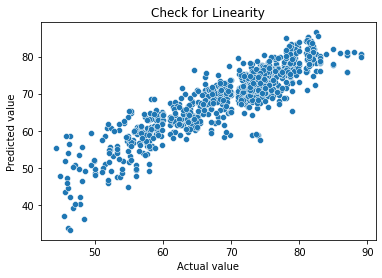

In [62]:
# Check for Linearity
sns.scatterplot(y_test['Life expectancy'],prediction)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

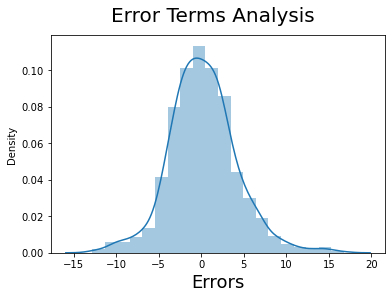

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test['Life expectancy'] - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)